# Nonlinear PDEs

\begin{array}
-\nabla \cdot (q(u)\nabla u) = f,\qquad \text{in } \Omega \\
u=u_D, \qquad\qquad\qquad \text{on }\partial\Omega
\end{array}
where $q(u)$ is a nonlinear function of $u$, making the PDE nonlinear.

In [ ]:
try:
    import dolfin as df
    import mshr
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/fenics-install.sh" -O "/tmp/fenics-install.sh" && bash "/tmp/fenics-install.sh"
    import dolfin as df
    import mshr

# import numpy as np and pyplot as plt.
import numpy as np
from matplotlib import pyplot as plt

# clear the long output of the fenics installation
from IPython.display import clear_output 
clear_output()

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


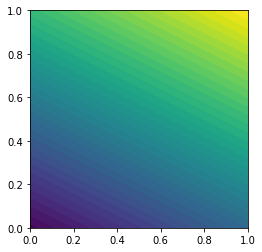

In [ ]:
#Mesh
mesh = df.UnitSquareMesh(8, 8)
#FE function space
V = df.FunctionSpace(mesh, 'P', 1)
#Boundary condition
uD = df.Expression('x[0] + 2*x[1] + 1', degree=2)
def boundary(x, on_boundary):
  return on_boundary
bc = df.DirichletBC(V, uD, boundary)
#Non linear term
def q(u):
  return 1 + u**2
#Other PDE data
f = df.Expression('-10*x[0] - 20*x[1] - 10', degree=2)
#Weak formulation
u = df.Function(V)
v = df.TrialFunction(V)
a = q(u) * df.dot(df.grad(u), df.grad(v)) * df.dx  #trilinear form
L = f*v * df.dx #functional
F = a - L
#Solution
df.solve(F==0, u, bc)
df.plot(u)